# 1 Decision Tree Algorithm

## 1.3 Building Decision Trees
i. Importing libs

In [62]:
import pandas as pd
from sklearn . tree import DecisionTreeClassifier
from sklearn . model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings ("ignore")

Renaming columns

ii. Dataset loading and exploratory data analysis
Loading Dataset

In [63]:
diabetes_df = pd.read_csv ("diabetes.csv")
diabetes_df.head () # Preview the dataset
diabetes_df.shape # Number of instances and variables

(768, 9)

In [64]:
col_names = ["pregnant","glucose","bp","skin","insulin","bmi","pedigree","age" ,"label"]
diabetes_df.columns = col_names # Rename column names

summery of dataset

In [65]:
diabetes_df.info() # Check data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Frequency distributions of values in variables

In [66]:
for col in col_names :
    print ( diabetes_df [ col ]. value_counts () )

pregnant
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64
glucose
99     17
100    17
111    14
125    14
129    14
       ..
56      1
169     1
149     1
65      1
190     1
Name: count, Length: 136, dtype: int64
bp
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
44      4
96      4
110     3
106     3
100     3
98      3
30      2
46      2
55      2
104     2
108     2
40      1
122     1
95      1
102     1
61      1
24      1
38      1
114     1
Name: count, dtype: int64
skin
0     227
32     31
30     27
27     23
23     22
18     20
33     20
28     20
31     19
39     18
19     18
29     17
25     16
40  

Exploring target variable

In [67]:
diabetes_df ["label"]. value_counts ()

label
0    500
1    268
Name: count, dtype: int64

Checking missing values in variables

In [68]:
diabetes_df.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

iii. Defining feature vector and target variable

In [69]:
X = diabetes_df . drop (["label"] , axis =1)
y = diabetes_df ["label"]

iv. Splitting data

In [70]:
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size =0.25 , random_state =1) # 75% training and 25% test
X_train . shape , X_test . shape # Shapes of X_train and X_test

((576, 8), (192, 8))

v. Feature engineering: encoding categorical variables

This is the process of transforming raw data into useful features that help us better understand our
model better and increase its predictive power

In [71]:
!pip install category_encoders==2.6.3

You should consider upgrading via the 'E:\My Projects\python\CO544 Machine Learnning\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [72]:
X_train.dtypes # Check data types in X_train
import category_encoders as ce
encoder = ce . OrdinalEncoder ( cols = X . columns . tolist () )
X_train = encoder . fit_transform ( X_train )
X_test = encoder . transform ( X_test )

vi. Building decision tree classifier with the Gini index criterion

In [73]:
clf_gini = DecisionTreeClassifier ( criterion ="gini", max_depth =4 , random_state=0)
clf_gini . fit ( X_train , y_train ) # Train the classifier

DecisionTreeClassifier(max_depth=4, random_state=0)

vii. Predicting results for the test set

In [74]:
y_pred = clf_gini.predict( X_test )

viii. Evaluating model

In [75]:
print ("Accuracy :", metrics . accuracy_score ( y_test , y_pred ) )

Accuracy : 0.6875


ix. Confusion matrix

A confusion matrix is a matrix that can be used to measure the performance of a machine learning algorithm, usually a supervised learning one. In general, each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class, but it can be the other way around as well.

Four types of outcomes are possible while evaluating a classification model performance:

- **True Positives (TP):** True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.
- **True Negatives (TN):** True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.
- **False Positives (FP):** False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.
- **False Negatives (FN):** False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

In [76]:
from sklearn . metrics import confusion_matrix
conf_mat = confusion_matrix ( y_test , y_pred )
print ("Confusion Matrix :\n", conf_mat)

Confusion Matrix :
 [[111  12]
 [ 48  21]]


## 1.4 Optimizing Decision Tree Performance

In scikit-learn, optimization of the decision tree classifier is performed primarily through pre-pruning. The maximum depth of the tree can be used as a control variable for pre-pruning. In addition to pre-pruning parameters, other attribute selection measures such as entropy can be used.

- **criterion**: *(optional, default="gini")*  
    Choose the attribute selection measure. This parameter allows us to use different attribute selection measures. Supported criteria are `"gini"` for the Gini index and `"entropy"` for information gain.

- **splitter**: *string, optional (default="best")*  
    Choose the split strategy. Supported strategies are `"best"` to choose the best split and `"random"` to choose the best random split.

- **max_depth**: *int or None, optional (default=None)*  
    Set the maximum depth of the tree. If `None`, then nodes are expanded until all leaves contain less than `min_samples_split` samples. A higher value of maximum depth can cause overfitting, while a lower value can cause underfitting.

(Source: [scikit-learn DecisionTreeClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))

## 1.5 Visualizing Decision Trees

In [ ]:
from six import StringIO
from IPython . display import Image
from sklearn . tree import export_graphviz
import pydotplus
dot_data = StringIO ()
export_graphviz ( clf_gini ,
    out_file = dot_data ,
    filled = True ,
    rounded = True ,
    special_characters = True ,
    feature_names = X . columns ,
    class_names =["0 " , "1 "])
graph = pydotplus . graph_from_dot_data ( dot_data . getvalue () )
graph . write_png ( " diabetes . png ")
Image ( graph . create_png () )

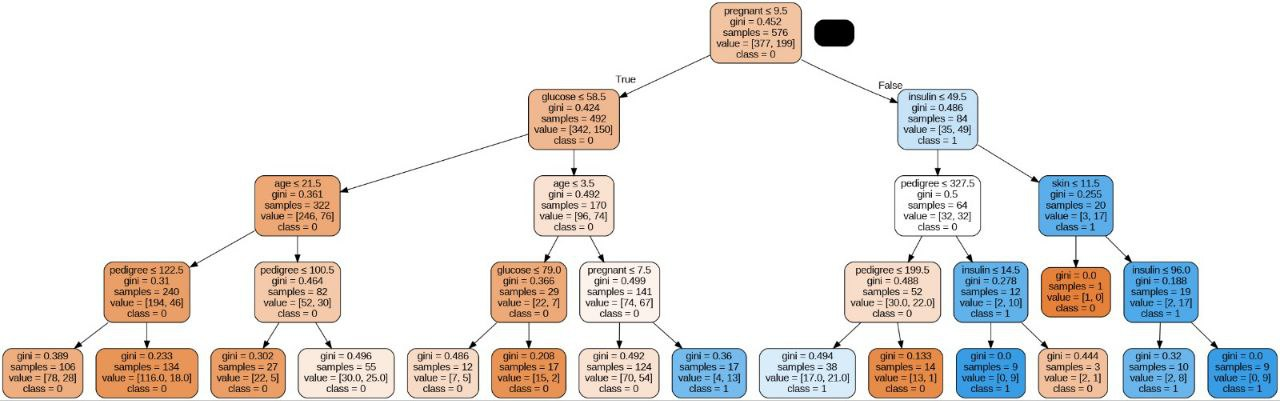

## 1.6 Classification Report

Classification report is another way to evaluate the classification model performance. It displays the precision,
recall, f1, and other support scores for the model.

In [77]:
from sklearn . metrics import classification_report
print ( classification_report ( y_test , y_pred ))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79       123
           1       0.64      0.30      0.41        69

    accuracy                           0.69       192
   macro avg       0.67      0.60      0.60       192
weighted avg       0.68      0.69      0.65       192



# 2 k-Nearest Neighbors (kNN)

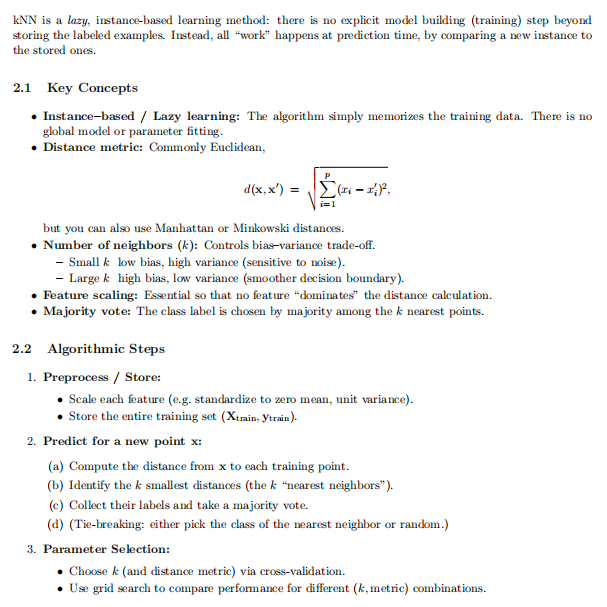

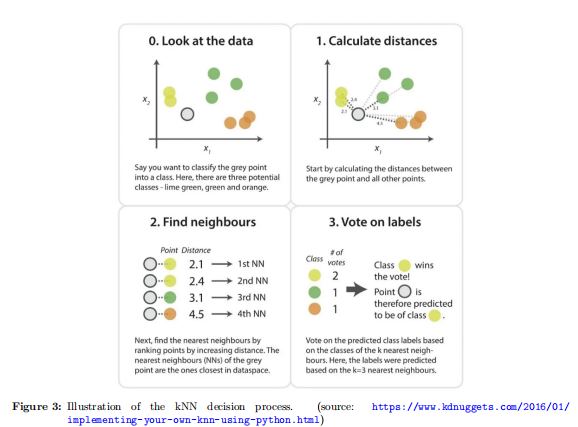

## 2.3 Advantages and Limitations

- Pros: Simple to implement; no training time; naturally handles multi-class.
- Cons: Prediction can be very slow for large datasets (O(n) per query); sensitive to irrelevant or unscaled
features; memory-intensive.

## 2.4 Implementation in Python

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report

# 1. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Hyperparameter tuning for k and distance metric
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan']
}
grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid.fit(X_train_scaled, y_train)
best_knn = grid.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)
print('Best params:', grid.best_params_)
print('kNN accuracy:', metrics.accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Best params: {'metric': 'manhattan', 'n_neighbors': 3}
kNN accuracy: 0.625
              precision    recall  f1-score   support

           0       0.68      0.78      0.73       123
           1       0.47      0.35      0.40        69

    accuracy                           0.62       192
   macro avg       0.58      0.56      0.56       192
weighted avg       0.61      0.62      0.61       192



## 2.5 Decision Boundary Visualization (2D projection)

if you pick any two features (here we use the first two), you can plot kNN’s decision regions:

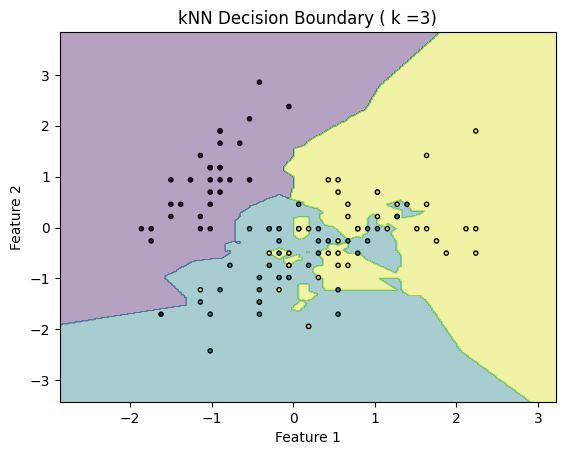

In [80]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Assuming you have loaded your data and split it into X and y
# Example using the Iris dataset:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid and perform GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 15), 'metric': ['euclidean', 'manhattan']}
knn_grid = KNeighborsClassifier()
grid = GridSearchCV(knn_grid, param_grid, cv=5)
grid.fit(X_train_scaled, y_train)


# Use only first two features
X2_train = X_train_scaled [: , :2]
X2_test = X_test_scaled [: , :2]
knn2 = KNeighborsClassifier (
n_neighbors = grid . best_params_ [ 'n_neighbors' ] ,
metric = grid . best_params_ [ 'metric' ]
)
knn2 . fit ( X2_train , y_train )
# create meshgrid
h = 0.02
x_min , x_max = X2_train [: ,0]. min () -1 , X2_train [: ,0]. max () +1
y_min , y_max = X2_train [: ,1]. min () -1 , X2_train [: ,1]. max () +1
xx , yy = np . meshgrid (
np . arange ( x_min , x_max , h ) ,
np . arange ( y_min , y_max , h )
)
# predict on grid
Z = knn2 . predict ( np . c_ [ xx . ravel () , yy . ravel () ]) . reshape ( xx . shape )
plt . figure ()
plt . contourf ( xx , yy , Z , alpha =0.4)
plt . scatter (
X2_train [: ,0] , X2_train [: ,1] ,
c = y_train , edgecolor = 'k' , marker = '.'
)
plt . xlabel ( 'Feature 1' )
plt . ylabel ( 'Feature 2' )
plt . title (f'kNN Decision Boundary ( k ={ grid . best_params_ [ "n_neighbors" ]})')
plt . show ()

# Task1

## 1. Task 1: Build two decision tree classifiers with Gini index and entropy criteria for the given Wine.csv
dataset. More information on the dataset is available on UCI Machine Learning Repository
(source: https://archive.ics.uci.edu/ml/datasets/Wine).

(a) Demonstrate how decision trees deal with missing values.

Decision trees handle missing values through:

Imputation: Replace missing values with mean/median

Native handling (scikit-learn ≥1.0): Automatically directs samples during splits

Steps to test:

In [84]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load wine dataset
wine_df = pd.read_csv('wine.csv')

# Introduce missing values (e.g., 10% in 'Alcohol')
import numpy as np
np.random.seed(1)
missing_mask = np.random.rand(len(wine_df)) < 0.1
wine_df.loc[missing_mask, 'Alcohol'] = np.nan

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = wine_df.drop('Wine', axis=1)
y = wine_df['Wine']
X_imputed = imputer.fit_transform(X)


from sklearn.impute import SimpleImputer

### Handling Missing Values in Decision Trees

In decision trees, missing values can be handled in several ways:

- **Imputation:** Replace missing values with the mean, median, or mode of the feature.  
    _Example used in code:_  
    ```python
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    ```
- **Native Handling:** Some implementations (e.g., scikit-learn ≥1.0) can handle missing values natively by directing samples with missing values down both branches during training and prediction.
- **Indicator Variables:** Add a binary feature indicating whether a value was missing.
- **Model-Based Imputation:** Use models (e.g., kNN, regression) to estimate missing values.

Imputation is the most common and compatible approach with scikit-learn's DecisionTreeClassifier.

(b) Evaluate the classifiers with suitable performance metrics.


In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.25, random_state=1
)

# Gini classifier
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
clf_gini.fit(X_train, y_train)

# Entropy classifier
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

Evaluation Metrics

Gini Report:
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.88      0.94        17
           3       0.91      1.00      0.95        10

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.95        45



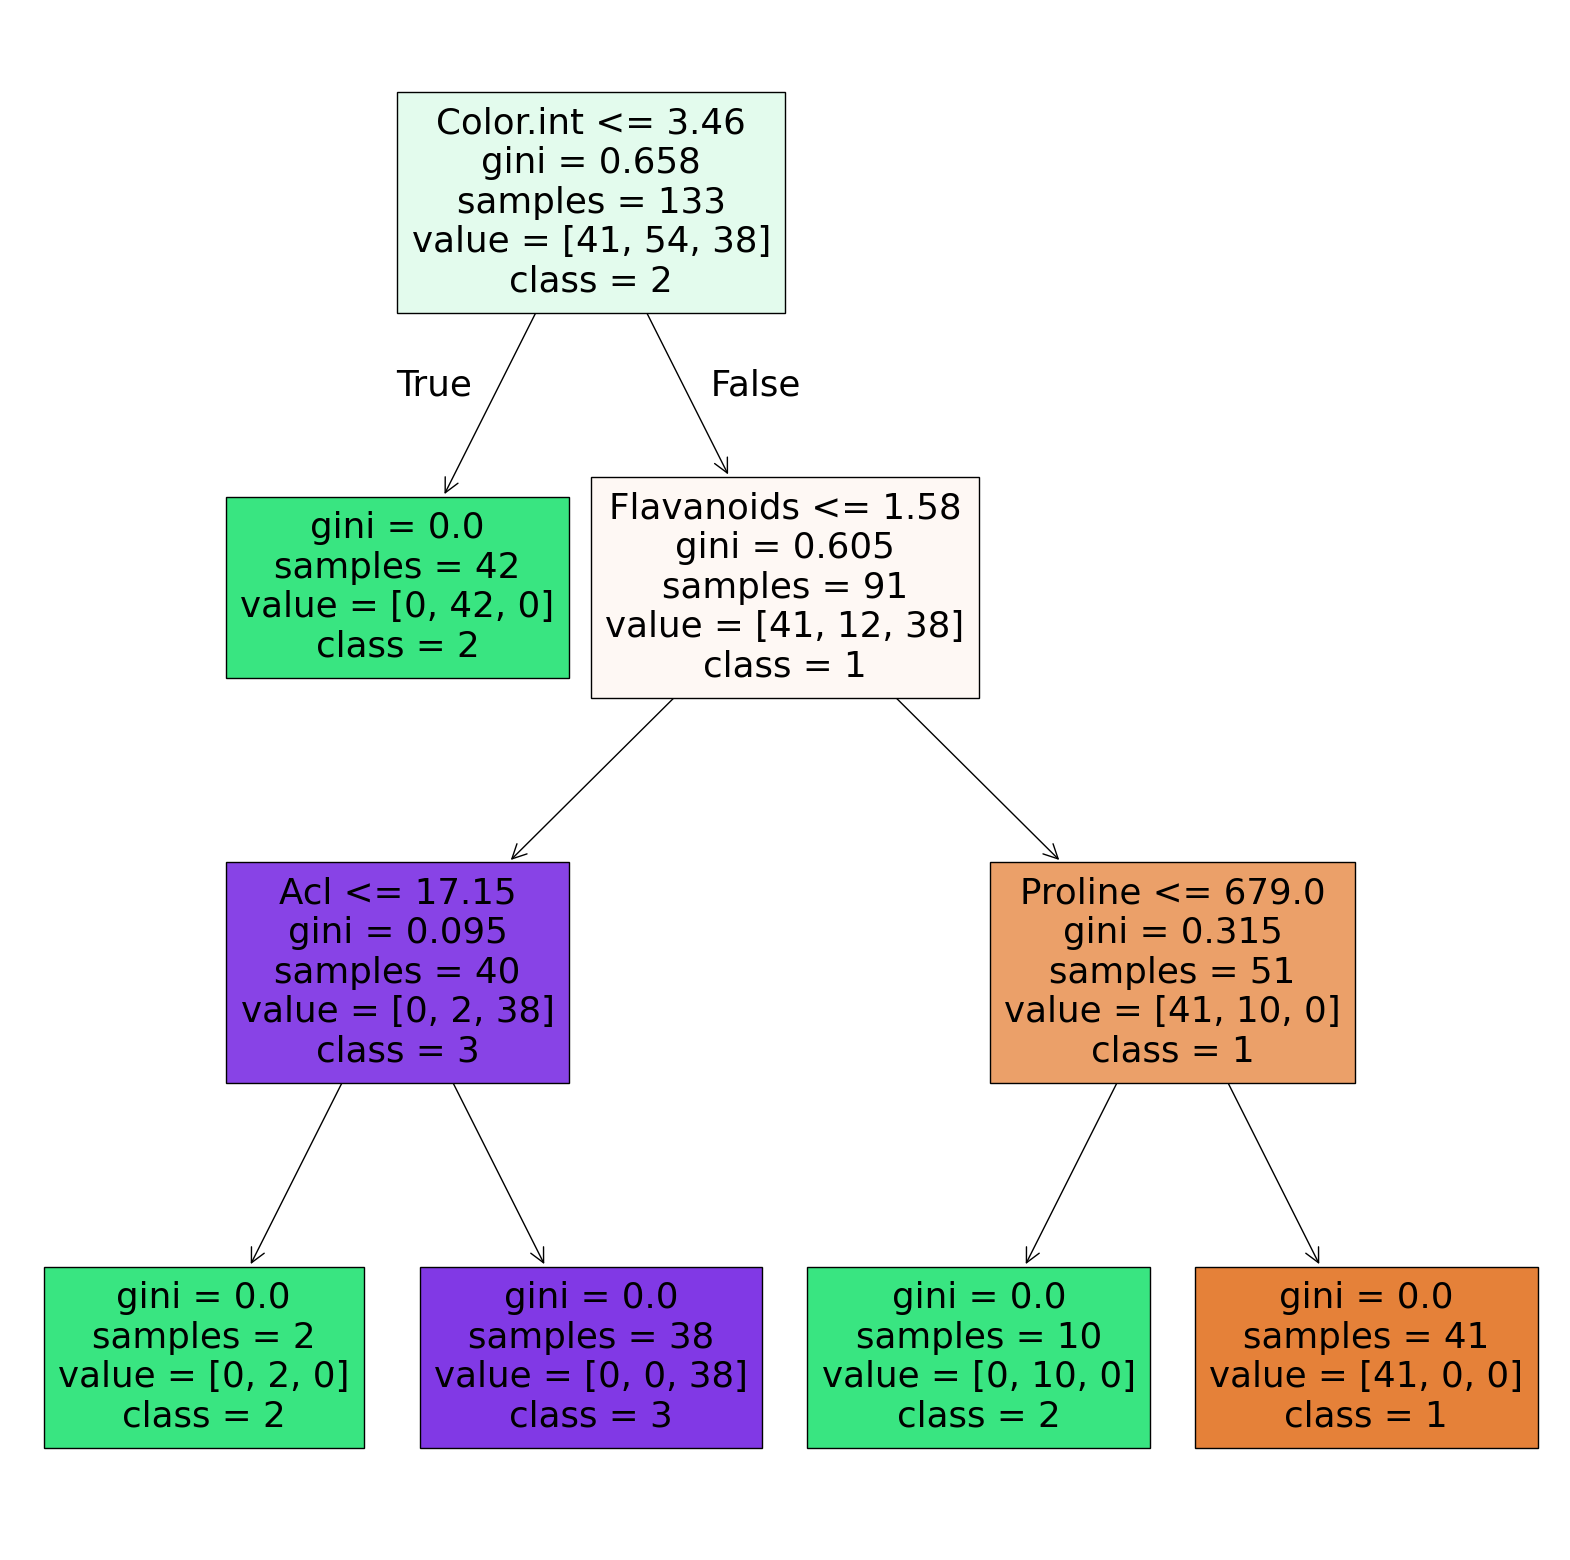

Entropy Report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        18
           2       0.94      0.94      0.94        17
           3       1.00      1.00      1.00        10

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



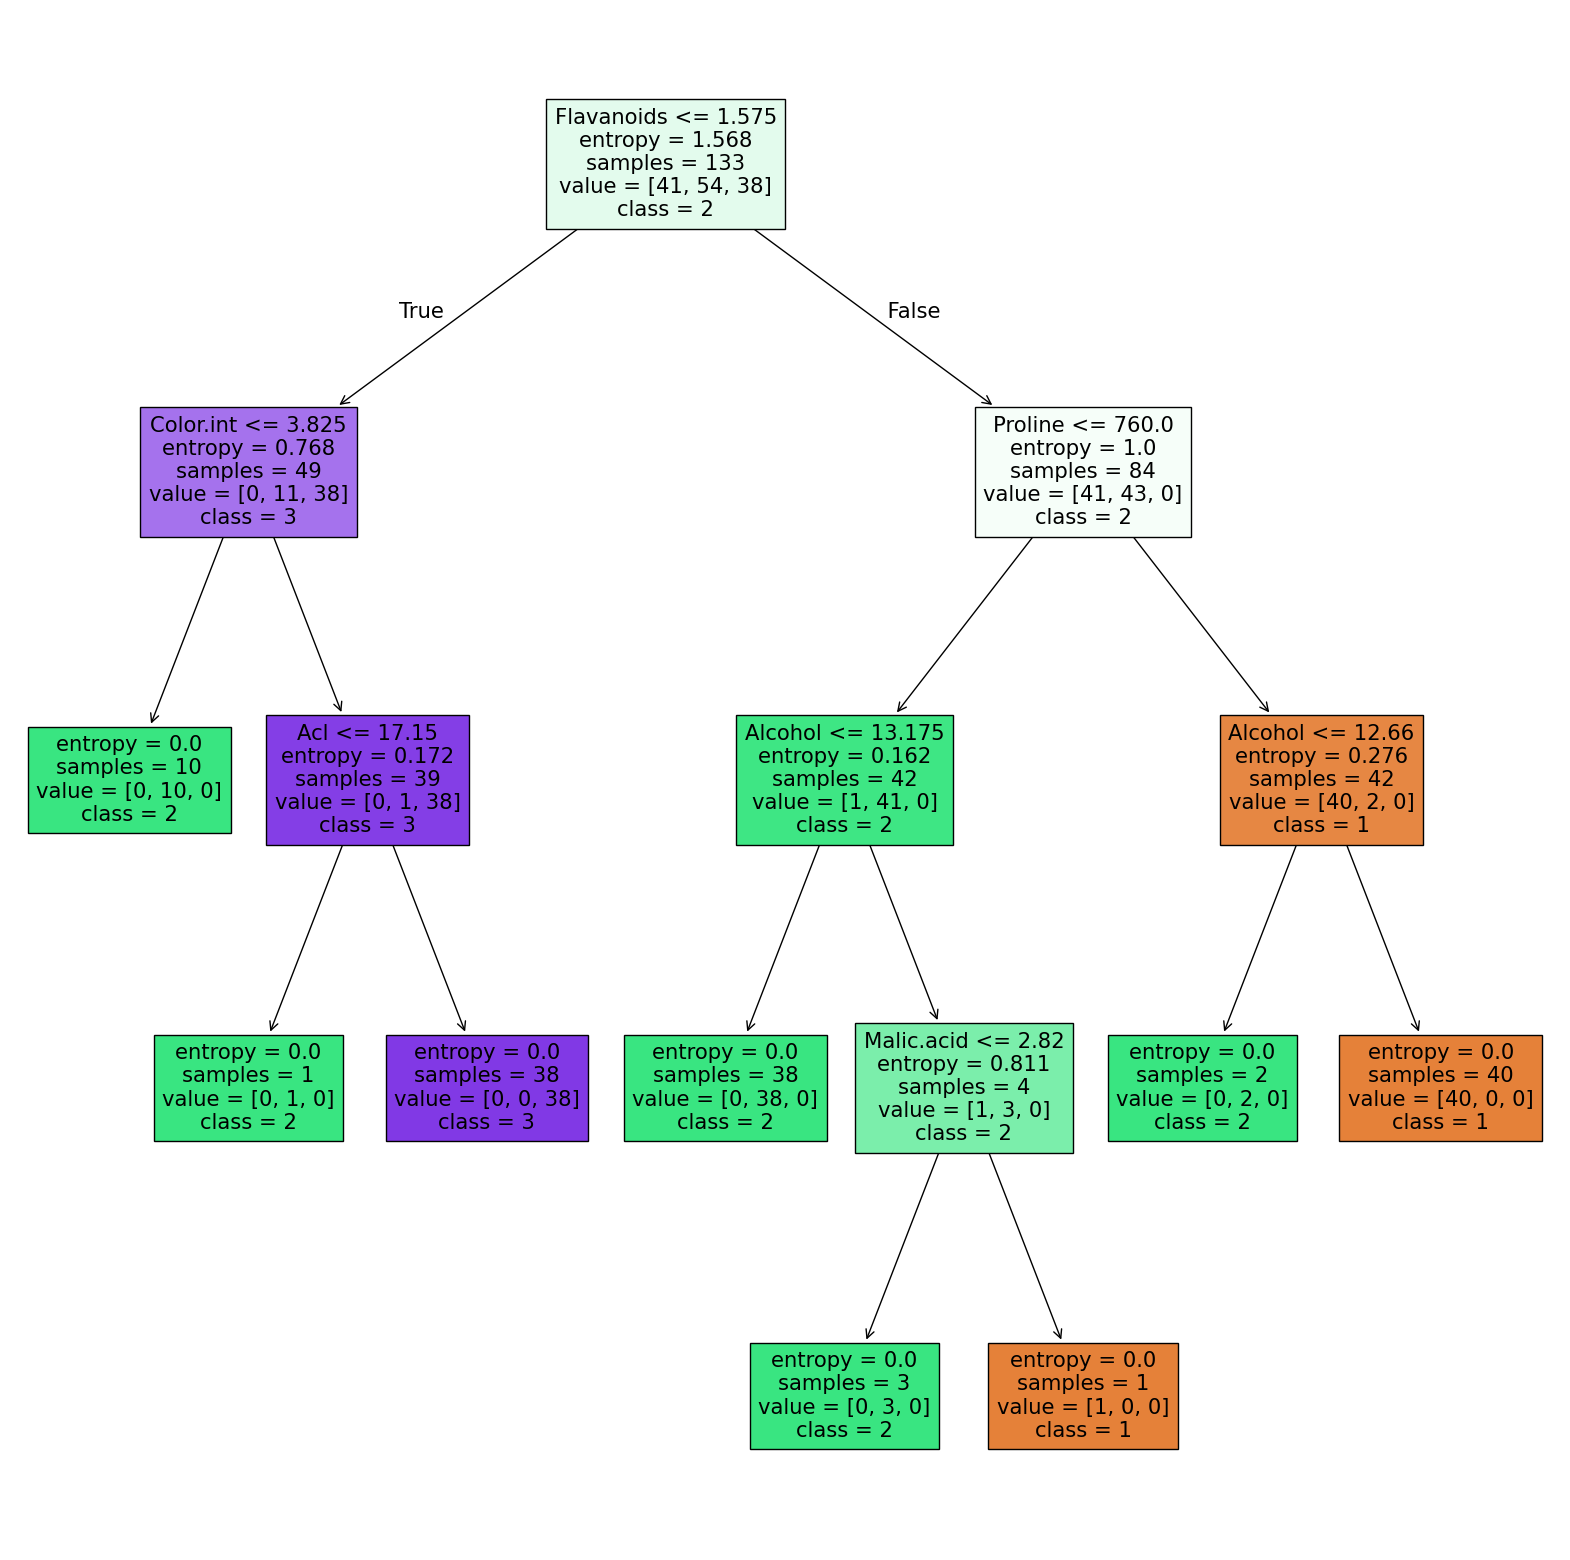

In [97]:
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

gini_pred = clf_gini.predict(X_test)
entropy_pred = clf_entropy.predict(X_test)

print("Gini Report:")
print(classification_report(y_test, gini_pred))
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plot_tree(clf_gini, 
          feature_names=X.columns,
          class_names=['1','2','3'],
          filled=True)
plt.savefig('pruned_tree.png')
plt.show()

print("Entropy Report:")
print(classification_report(y_test, entropy_pred))

plt.figure(figsize=(20,20))
plot_tree(clf_entropy, 
          feature_names=X.columns,
          class_names=['1','2','3'],
          filled=True)
plt.savefig('pruned_tree.png')
plt.show()


### Evaluation of Decision Tree Classifiers

To evaluate the performance of the decision tree classifiers (using both Gini index and Entropy criteria), we use the following metrics:

- **Precision:** The ratio of correctly predicted positive observations to the total predicted positives.
- **Recall (Sensitivity):** The ratio of correctly predicted positive observations to all actual positives.
- **F1-Score:** The weighted average of Precision and Recall, providing a balance between the two.
- **Support:** The number of actual occurrences of each class in the test set.
- **Accuracy:** The overall ratio of correctly predicted observations to the total observations.

The `classification_report` from scikit-learn summarizes these metrics for each class, allowing us to compare the performance of the Gini and Entropy-based decision trees. By analyzing these metrics, we can determine which criterion yields better classification results for the given dataset.

(c) Demonstrate how pruning can be applied to overcome overfitting of decision tree classifiers.


(d) Visualize decision trees

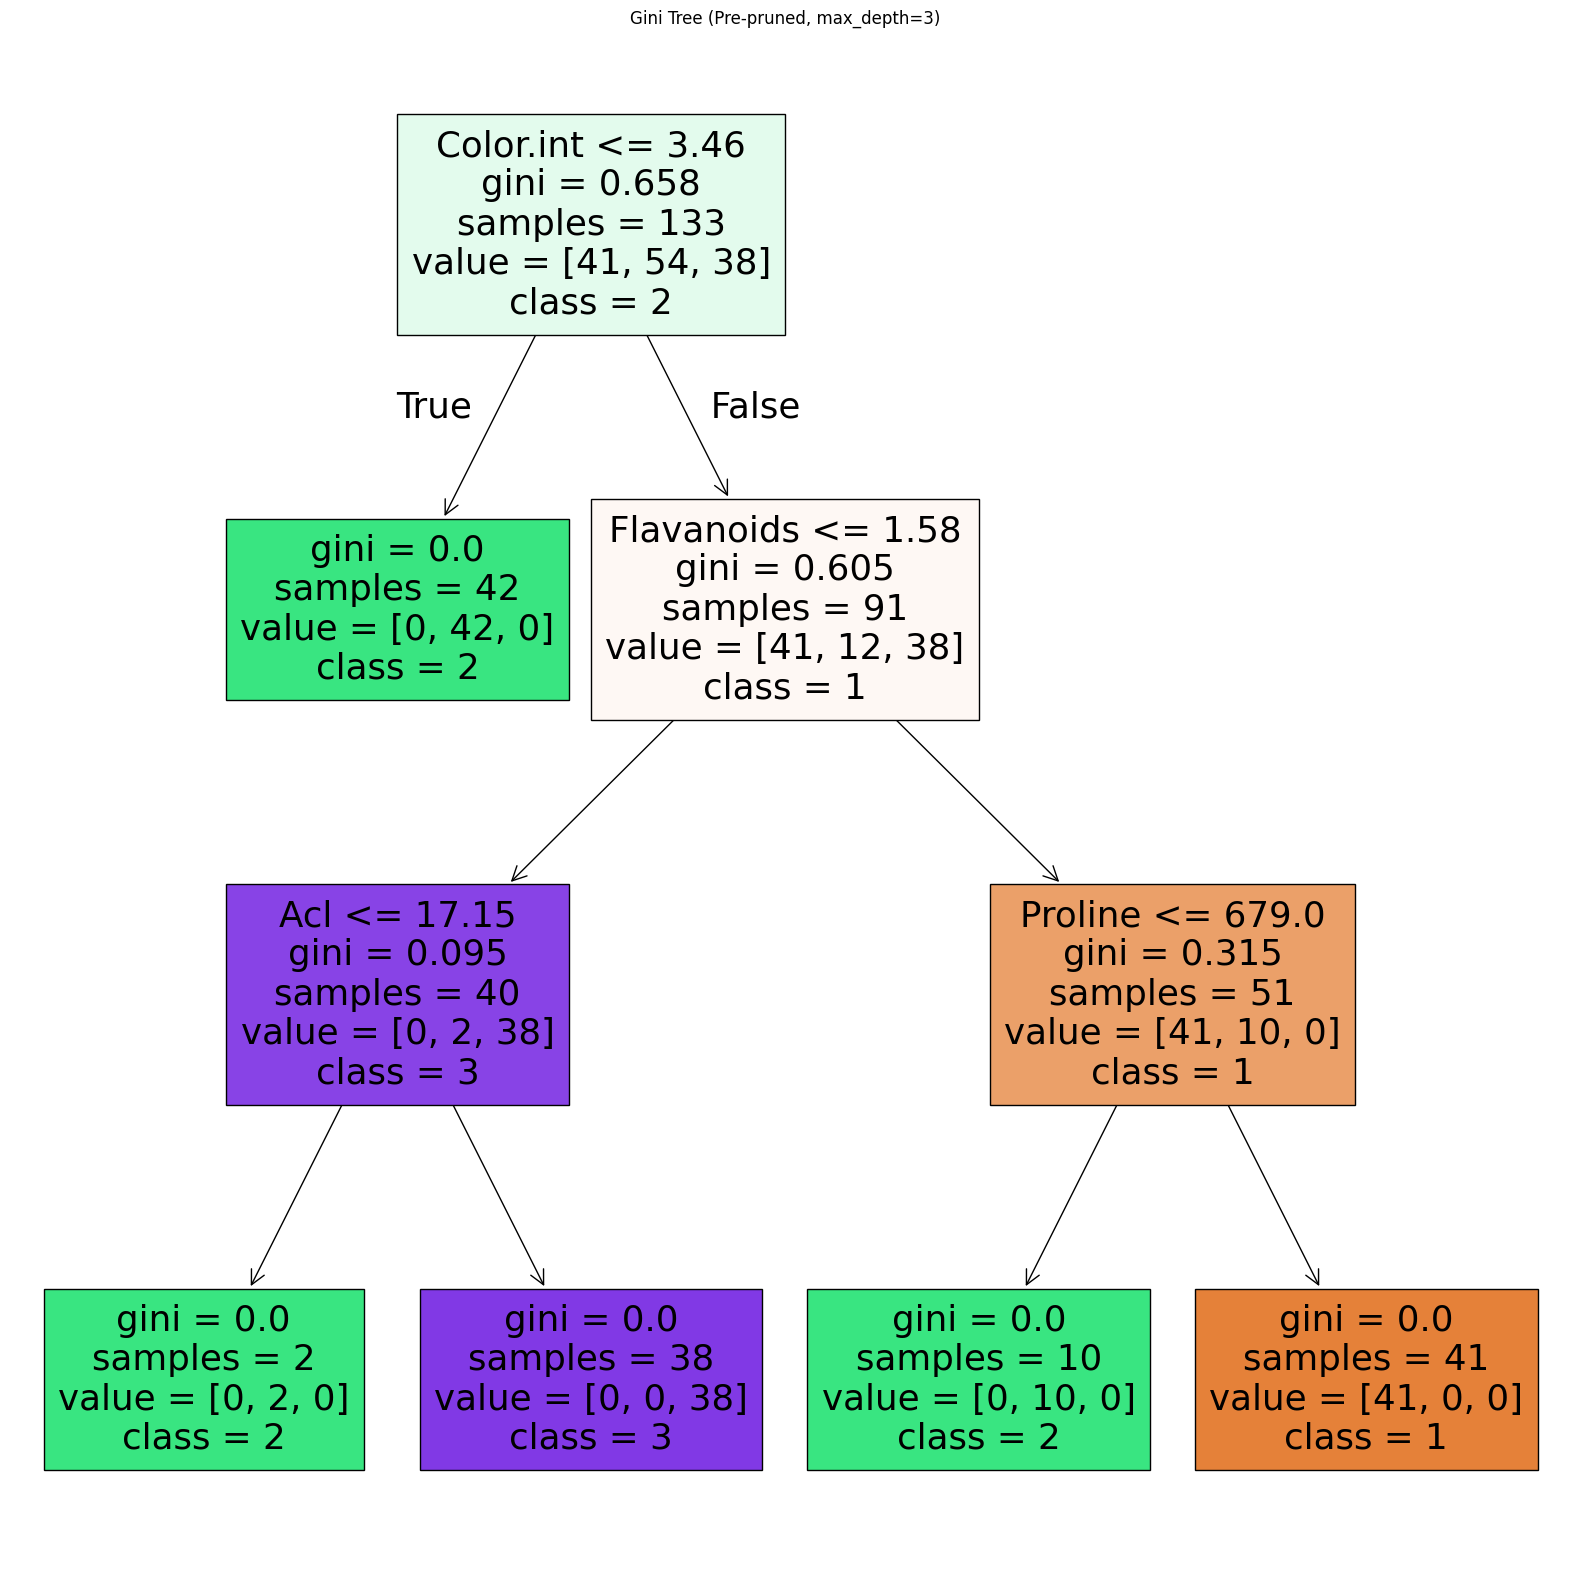

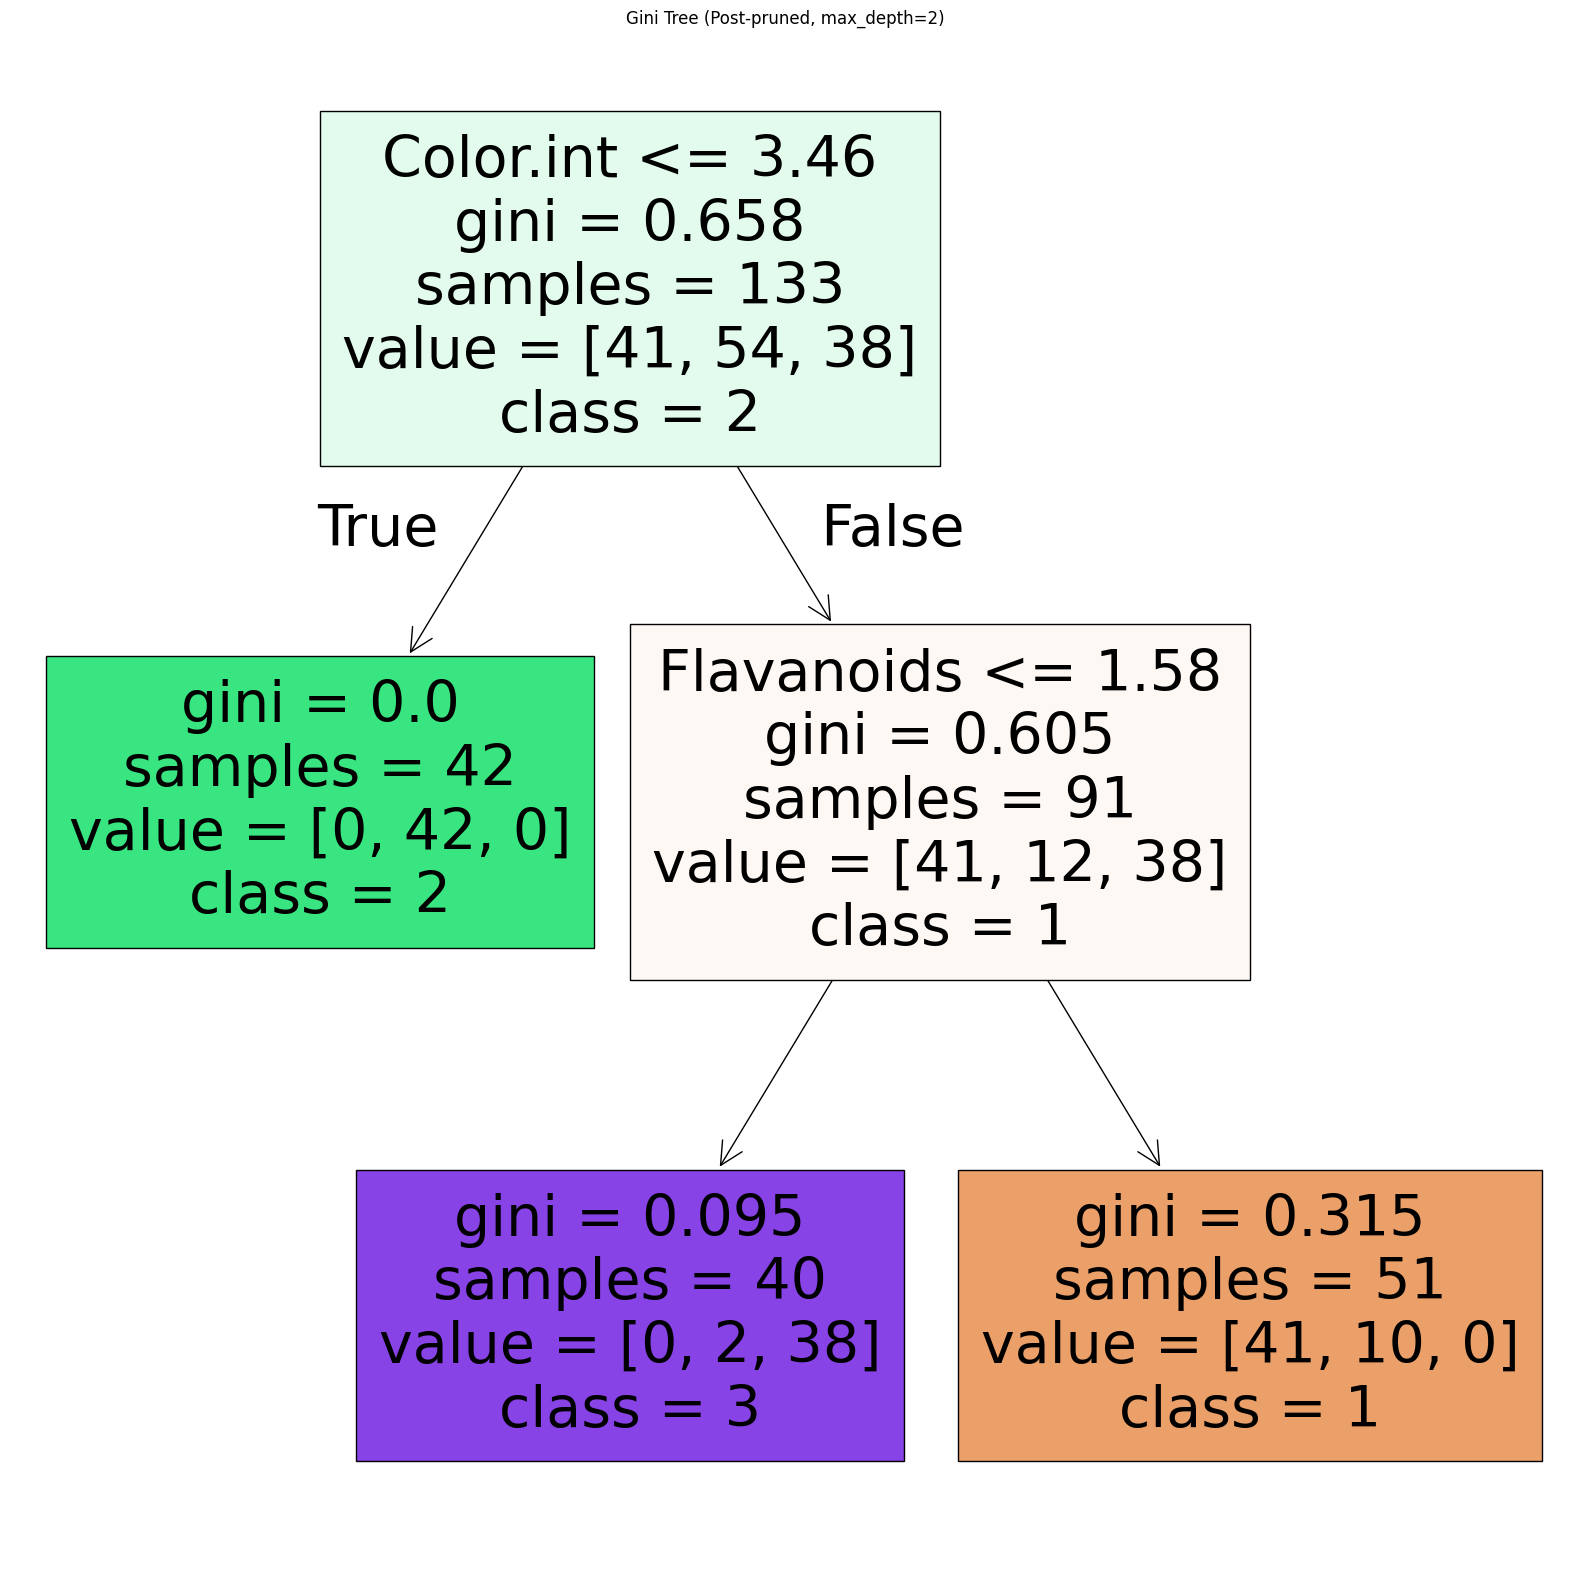

Other pruning methods: min_samples_split, min_samples_leaf, max_leaf_nodes, ccp_alpha (cost-complexity pruning)


In [ ]:
# Pre-pruning: Limit tree depth to avoid overfitting
clf_gini_pruned = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini_pruned.fit(X_train, y_train)

plt.figure(figsize=(20, 20))
plot_tree(clf_gini_pruned, 
          feature_names=X.columns,
          class_names=['1', '2', '3'],
          filled=True)
plt.title("Gini Tree (Pre-pruned, max_depth=3)")
plt.show()

# Post-pruning: Limit tree depth after initial fit (can also use ccp_alpha for cost-complexity pruning)
clf_gini_postpruned = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)
clf_gini_postpruned.fit(X_train, y_train)

plt.figure(figsize=(20, 20))
plot_tree(clf_gini_postpruned, 
          feature_names=X.columns,
          class_names=['1', '2', '3'],
          filled=True)
plt.title("Gini Tree (Post-pruned, max_depth=2)")
plt.show()


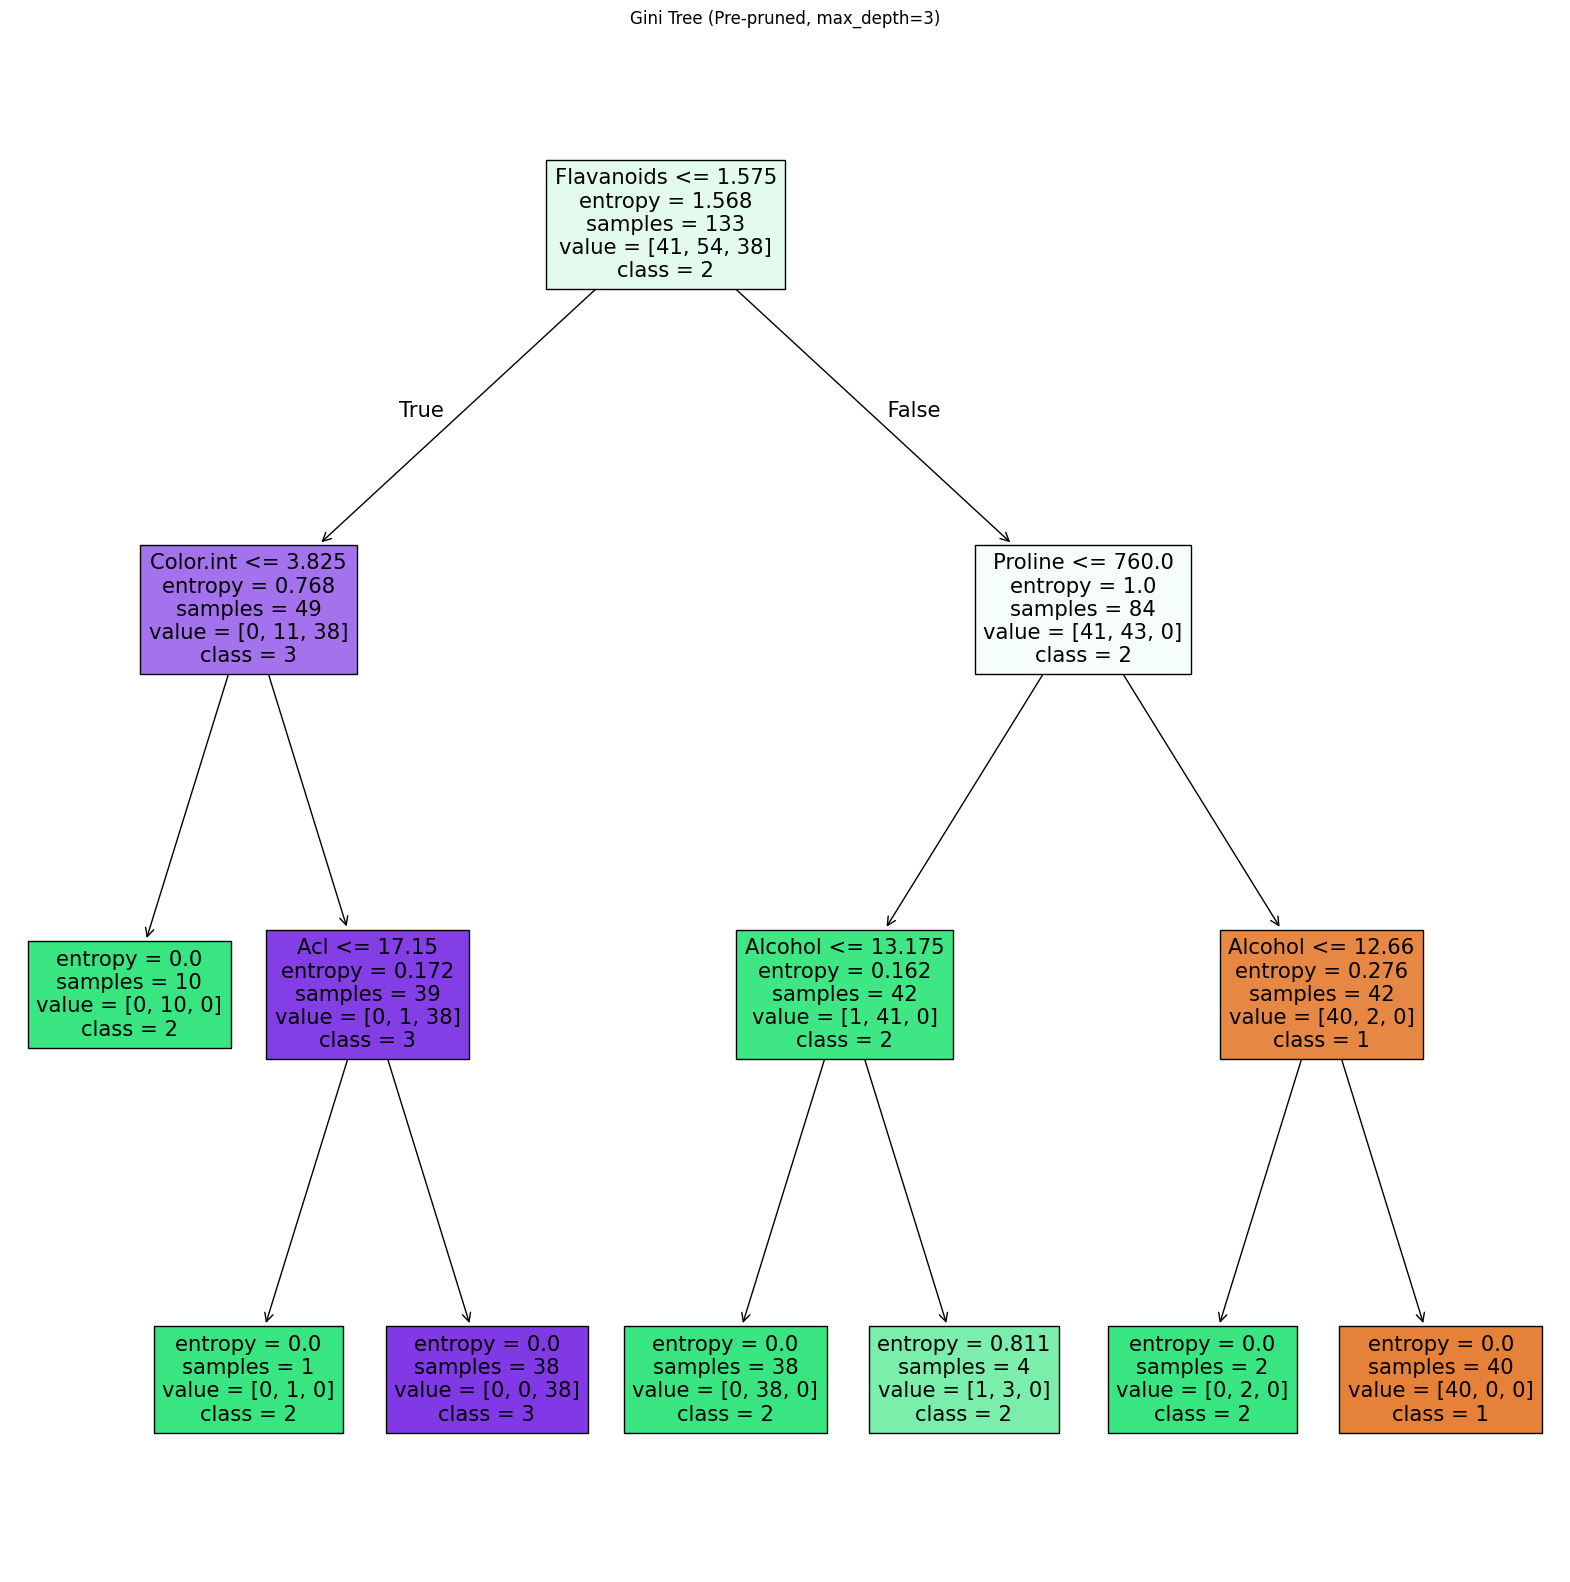

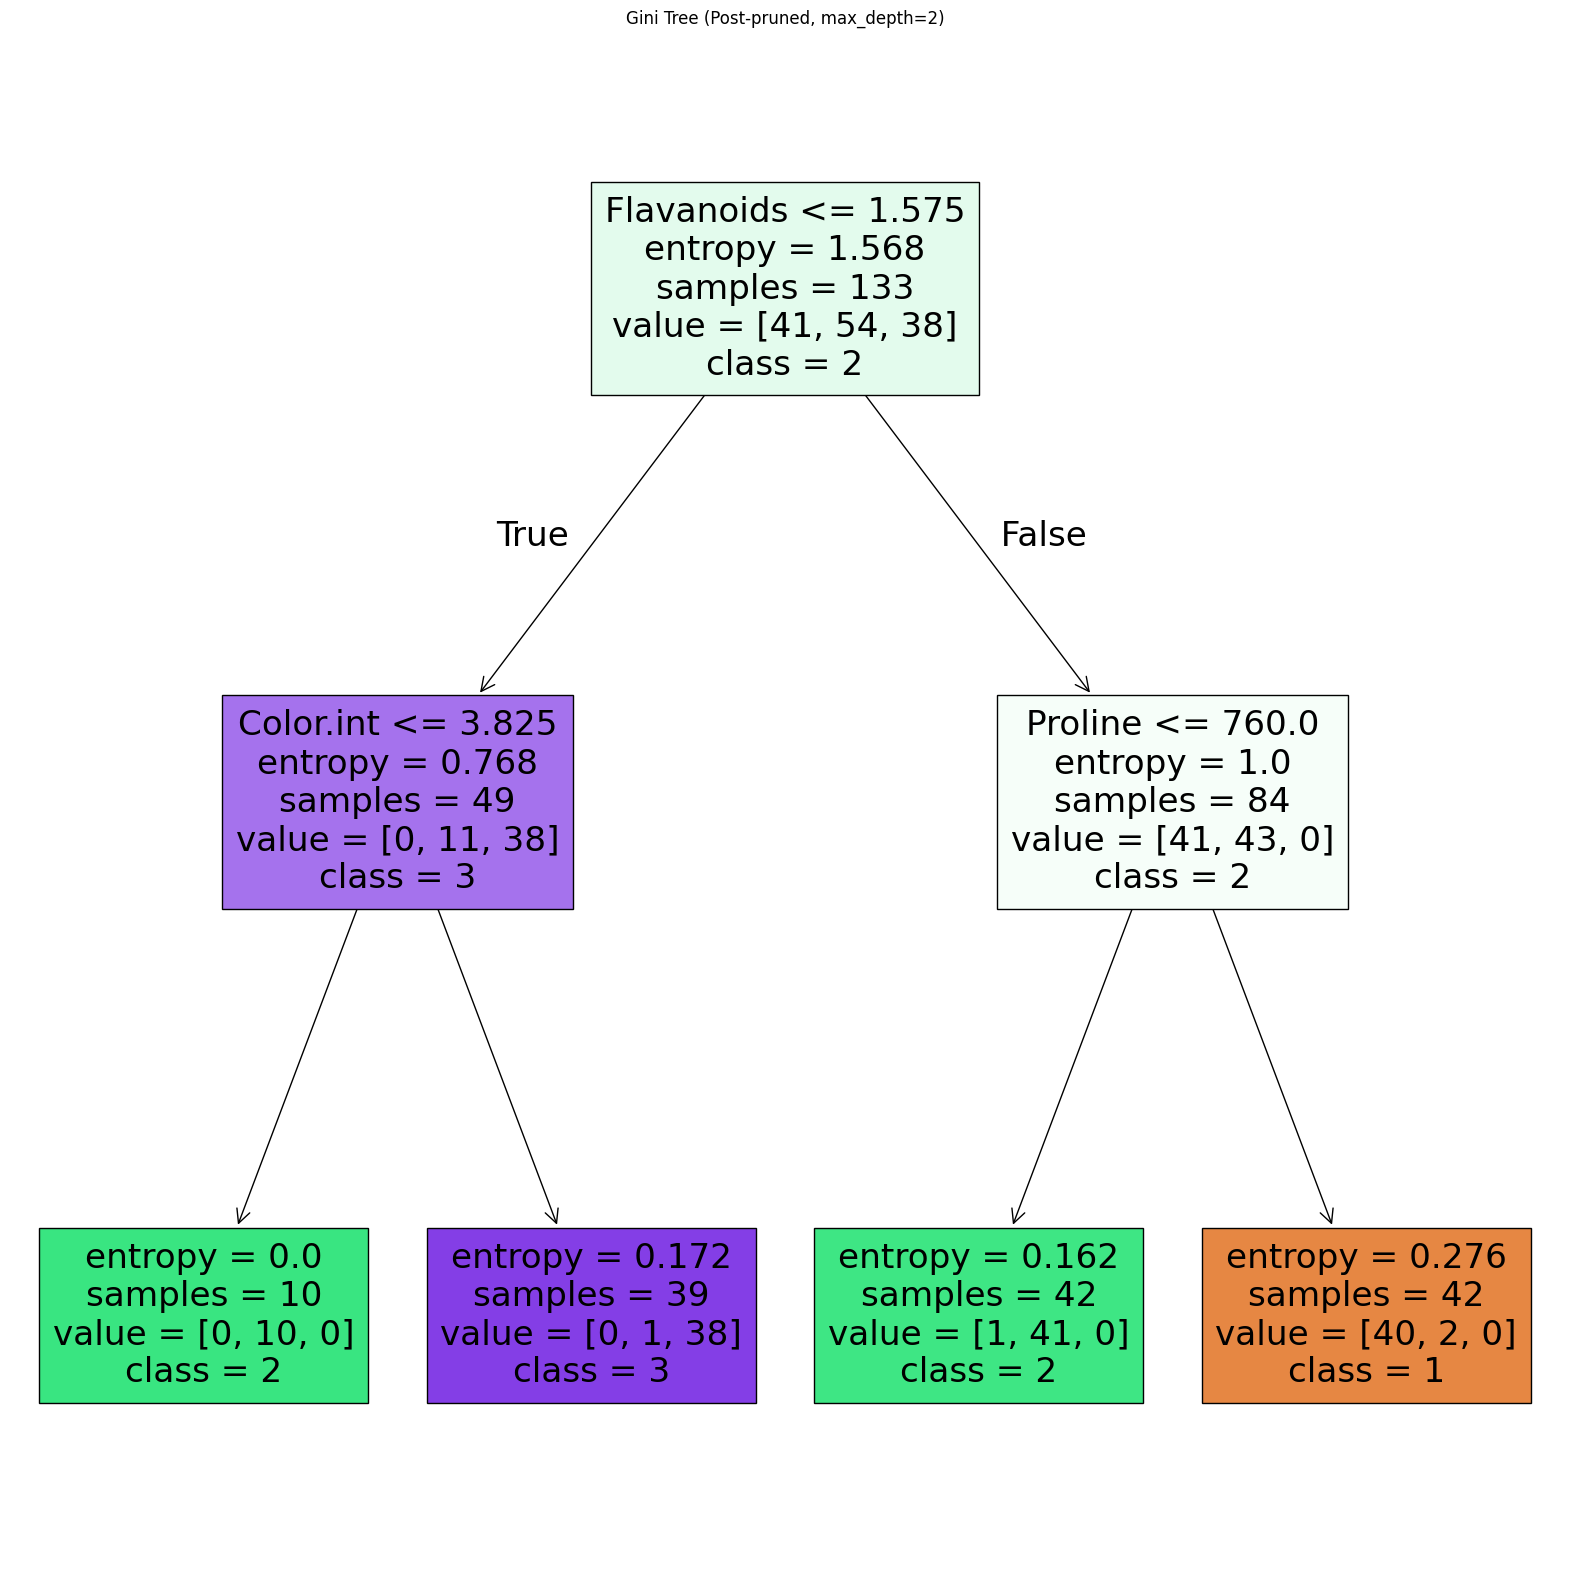

In [ ]:
# Pre-pruning: Limit tree depth to avoid overfitting
clf_gini_pruned = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_gini_pruned.fit(X_train, y_train)

plt.figure(figsize=(20, 20))
plot_tree(clf_gini_pruned, 
          feature_names=X.columns,
          class_names=['1', '2', '3'],
          filled=True)
plt.title("entropy Tree (Pre-pruned, max_depth=3)")
plt.show()

# Post-pruning: Limit tree depth after initial fit (can also use ccp_alpha for cost-complexity pruning)
clf_gini_postpruned = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
clf_gini_postpruned.fit(X_train, y_train)

plt.figure(figsize=(20, 20))
plot_tree(clf_gini_postpruned, 
          feature_names=X.columns,
          class_names=['1', '2', '3'],
          filled=True)
plt.title("entropy Tree (Post-pruned, max_depth=2)")
plt.show()


### Other pruning methods to consider:
- min_samples_split: Minimum samples required to split an internal node
- min_samples_leaf: Minimum samples required to be at a leaf node
- max_leaf_nodes: Maximum number of leaf nodes
- ccp_alpha: Cost-complexity pruning parameter (post-pruning)


# Task 2


In [101]:
import time
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# (a) Preprocess with feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**(a) Preprocess with Feature Scaling**  
We applied feature scaling using `StandardScaler` to standardize the features in both the training and test sets. This step is crucial for k-Nearest Neighbors (kNN) because the algorithm relies on distance calculations, which can be skewed if features are on different scales.

In [102]:
# (b) Tune k (and distance metric) via cross-validation
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

start_time = time.time()
grid.fit(X_train_scaled, y_train)
runtime = time.time() - start_time

best_knn = grid.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

print("Best k:", grid.best_params_['n_neighbors'])
print("Best metric:", grid.best_params_['metric'])



Best k: 7
Best metric: euclidean



**(b) Tune k (and Distance Metric) via Cross-Validation**  
We used `GridSearchCV` to perform cross-validation and search for the optimal number of neighbors (`k`) and the best distance metric (`euclidean` or `manhattan`) for the kNN classifier. This ensures that our model is well-tuned for the dataset.


In [103]:
# (c) Compare kNN’s accuracy, precision/recall, and runtime to decision tree results
print("\n--- kNN Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Runtime (seconds):", runtime)

print("\n--- Decision Tree (Gini) Results ---")
gini_pred = clf_gini.predict(X_test)
print("Accuracy:", accuracy_score(y_test, gini_pred))
print("Classification Report:\n", classification_report(y_test, gini_pred))

print("\n--- Decision Tree (Entropy) Results ---")
entropy_pred = clf_entropy.predict(X_test)
print("Accuracy:", accuracy_score(y_test, entropy_pred))
print("Classification Report:\n", classification_report(y_test, entropy_pred))


--- kNN Results ---
Accuracy: 0.9555555555555556
Classification Report:
               precision    recall  f1-score   support

           1       0.90      1.00      0.95        18
           2       1.00      0.88      0.94        17
           3       1.00      1.00      1.00        10

    accuracy                           0.96        45
   macro avg       0.97      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Runtime (seconds): 0.6717298030853271

--- Decision Tree (Gini) Results ---
Accuracy: 0.9555555555555556
Classification Report:
               precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.88      0.94        17
           3       0.91      1.00      0.95        10

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.95        45


--- Decision Tree (Entropy) Result

**(c) Compare kNN’s Accuracy, Precision/Recall, and Runtime to Decision Tree Results**  
After training the best kNN model, we evaluated its performance on the test set using accuracy and a classification report (which includes precision, recall, and F1-score). We also measured the runtime for model selection and training.  
For comparison, we evaluated two decision tree classifiers (one using the Gini index and one using entropy) on the same test set, reporting their accuracy and classification metrics. This allows us to directly compare the effectiveness and efficiency of kNN versus decision trees on this dataset.